# Deep-Learning-KNN&MLP-Fashion-MNIST

## Dataset Description
The Fashion-MNIST dataset originally consists of a training set of 60,000 examples and a test set of 10,000 examples. However, in this notebook, we are using a smaller sample of the entire dataset, where we have 35,000 training examples, and 17,500 test examples. Each example is a 28 x 28 grayscale image of a fashion item, with a total of 10 different labels or categories.

## Objectives
While Convolutional neural network (CNN) is most commonly applied to image classification tasks, we will attempt to explore other methods that can accomplish the same tasks. Based on the Fashion-MNIST dataset, we will be fulfiling the following objectives:

### Objective 1
First, we will train a K-NN model to try obtaining the best result we can get. Explanation on how the parameters or cost functions are chosen will be given.

### Objective 2
Second, We will train an MLP model with various architectures based on Cross-Entropy Loss. The different architectures will be based on the following:
1. Number of hidden layers = 0, 1, 2, 5
2. For each layer, number of hidden units = 16, 64, 256

Based on the best MLP model above,  we will then evaluate the effect on performance of the following different optimizers:
1. SGD
2. SGD with momentum
3. AdaGrag
4. RMSProp
5. ADAM

Finally, we will attempt to train a final MLP with any configuration to try and get the best performance.

# Objective 1

## 1.0 Importing Packages

First, we begin by importing the necessary packages prior to training a K-NN model.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

## 1.1 Loading Dataset

Next, we will load the Fashion MNIST dataset by de-serializing the pickled files into Python objects.

In [299]:
import pickle
with open("train_imgs.pkl","rb") as a:
    train_imgs = pickle.load(a)
with open("train_labels.pkl","rb") as b:
    train_labels = pickle.load(b)
with open("test_imgs.pkl","rb") as c:
    test_imgs = pickle.load(c)
with open("test_labels.pkl","rb") as d:
    test_labels = pickle.load(d)

### 1.1.1 Checking Dataset Size

Upon loading the datasets, we want to take a glimpse at the shape of our data.

In [300]:
print('The train image dataset has shape:', train_imgs.shape)
print('The test image dataset has shape:',test_imgs.shape)
print('The train label dataset has shape:',train_labels.shape)
print('The test label dataset has shape:',test_labels.shape)

The train image dataset has shape: (35000, 28, 28)
The test image dataset has shape: (17500, 28, 28)
The train label dataset has shape: (35000,)
The test label dataset has shape: (17500,)


## 1.2 Data Pre-processing

Next, before we train our model, we need to perform several data pre-processing.

### 1.2.1 Reshaping Train and Test Image Datasets

First, we want to reshape our train and test image dataset to four dimensions.

The first dimension refers to the number of train and test images in the dataset. The second and third dimension refers to the height and width of each image, and the fourth dimension refers to the number of channel. In this case, our fourth dimension is equal to '1', as our images are in grayscale. If the images are colored (i.e. in red, green and blue), the number of channels would be equal to '3'.

In [301]:
img_x, img_y = 28, 28

train_imgs = train_imgs.reshape(train_imgs.shape[0], img_x, img_y, 1)
test_imgs = test_imgs.reshape(test_imgs.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

The final shape of the train and test image datasets are shown below:

In [302]:
print('The train image dataset has shape:', train_imgs.shape)
print('The test image dataset has shape:',test_imgs.shape)

The train image dataset has shape: (35000, 28, 28, 1)
The test image dataset has shape: (17500, 28, 28, 1)


### 1.2.2 Normalizing Train and Test Image Datasets Between 0 and 1

In this dataset, each image's pixel's value lies between [0, 255]. However, in order to improve convergence and learning by our model, we want to first normalize and scale our features to [0, 1]. The rescaling of the images is thus performed by dividing each pixel’s value by 255.

Prior to the rescaling, the elements in each pixel are represented by the values indicated in the example below:

In [292]:
train_imgs[0][0]

array([[  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  1],
       [  0],
       [  0],
       [  0],
       [  0],
       [ 17],
       [168],
       [126],
       [ 79],
       [ 82],
       [109],
       [159],
       [152],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0]], dtype=uint8)

Therefore, the following rescaling has to be performed:

In [303]:
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

After performing the rescaling, we can see that the values have been normalized to values between 0 and 1 based on the example below:

In [294]:
train_imgs[0][0]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00392157],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.06666667],
       [0.65882353],
       [0.49411765],
       [0.30980392],
       [0.32156863],
       [0.42745098],
       [0.62352941],
       [0.59607843],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## 1.3 Visualizing the Dataset

Next, in order for us to understand our dataset better, we want to first visualize the images in our dataset, according to their true label. We will perform the visualization on our train dataset. First, we will rearrange our images and their corresponding labels in an ascending order, where images assigned to label '0' will appear on the first row, and images assigned to label '9' will appear on the last row. 

However, for simplicity, we will only visualize 35 images for each class, for all 10 classes as shown below:

In [304]:
training_size = 3500
test_size = 1750

x_train_filter, y_train_filter = np.empty(shape=(training_size, 28, 28, 1)), []

for label in list(set(train_labels)):
    sample_filter = np.where((train_labels == label))
    x_train_filter = np.append(x_train_filter, np.array(train_imgs[sample_filter][:training_size]), axis=0)
    y_train_filter += [label]*training_size
    
x_train_filter = x_train_filter[training_size:,:,:]

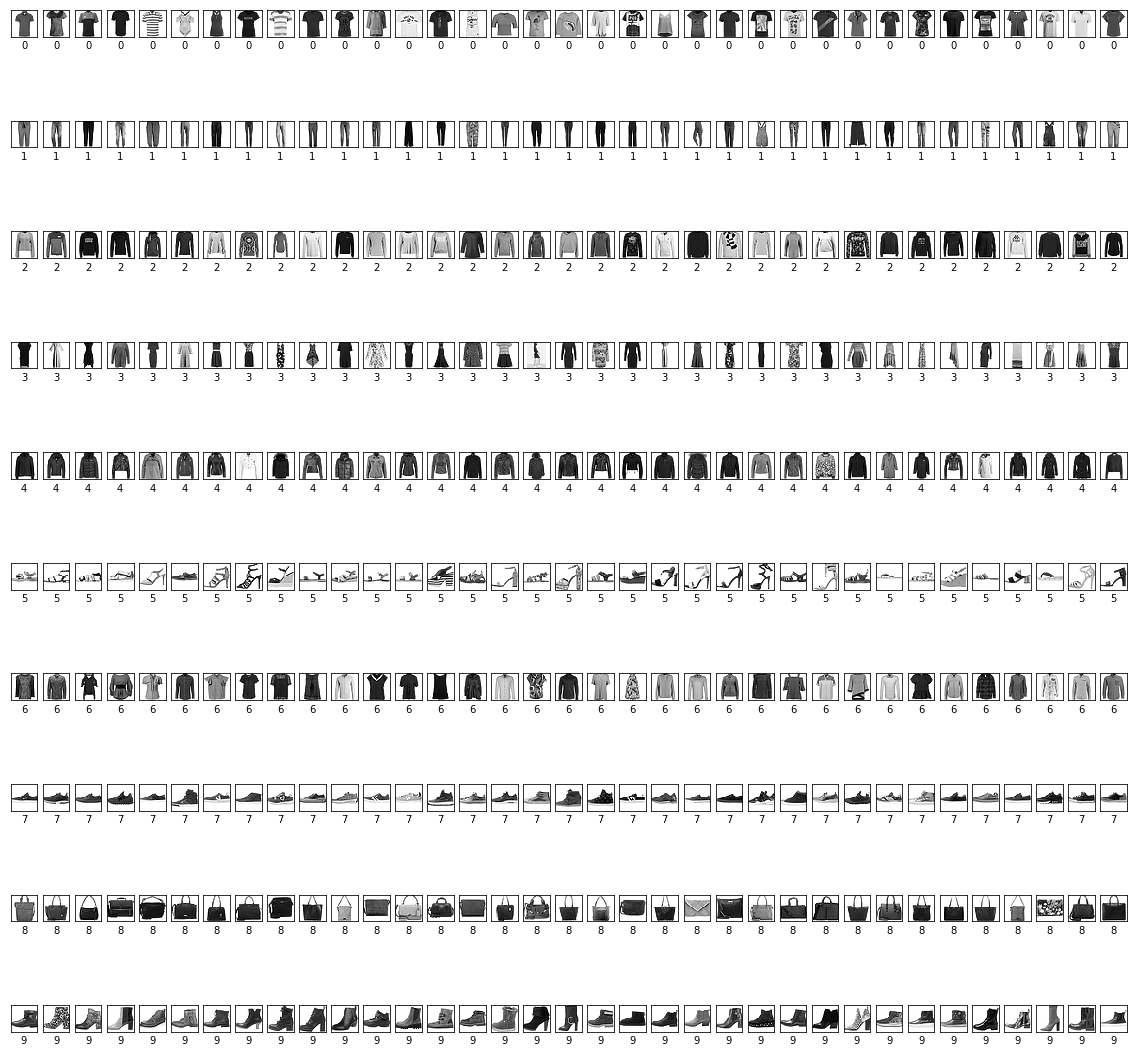

In [305]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,20))
for i in range(0,35000,100):
    plt.subplot(10,35,i/100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_filter[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train_filter[i])

According to https://github.com/zalandoresearch/fashion-mnist, the following are the description of each label:  

0 - T-shirt/top  
1 - Trouser  
2 - Pullover  
3 - Dress  
4 - Coat  
5 - Sandal  
6 - Shirt  
7 - Sneaker  
8 - Bag  
9 - Ankle boot

## 1.4 Flattening Images into a Single Dimension

Next, we will flatten our 28 X 28 images into a single dimension of size 784 to start building our K-NN model.

In [306]:
train_imgs = train_imgs.reshape(training_size*10, 784) #28*28
test_imgs = test_imgs.reshape(test_size*10, 784)
train_labels = np.eye(len(set(train_labels)))[train_labels]

Consequently, the flattened image datasets have the following shapes:

In [307]:
print('The flattened train image dataset has shape:', train_imgs.shape)
print('The flattened test image dataset has shape:',test_imgs.shape)

The flattened train image dataset has shape: (35000, 784)
The flattened test image dataset has shape: (17500, 784)


## 1.5 Building the K-NN Model 

Once we have completed the data pre-processing above, we will now build our K-NN model. Given images in our test dataset, we want to find k images in the train dataset that are nearest to the test images, and to assign the most frequent label of k labels to the test images. 

In this case, the proximity between the train and test images are dependent on the choice of our distance metrics. For the purpose of this assignment, we will define our distance metrics as L1 Distance, Euclidean Distance and Cosine Similarity, to see which distance metric performs the best in the following section 6.1, 6.2 and 6.3 respectively. 

Additionally, we will train our K-NN model on various k values to determine the k value that gives the best accuracy, with the consideration of the time taken for each k value to train the K-NN model.

### 1.5.1 Building the K-NN Model Based on L1 / Manhattan Distance

Our first K-NN Model will be built based on L1 Distance, where we will attempt to train the model based on k values = [3,4,5,6,7,8,9] to see which k value performs the best with the highest accuracy.

In [48]:
#create tensorflow session
feature_number = len(train_imgs[0])
label_number = len(train_labels[0])

#knn
k_num = [3,4,5,6,7,8,9]

x_data_train = tf.placeholder(shape=[None, feature_number], dtype=tf.float32)
y_data_train = tf.placeholder(shape=[None, label_number], dtype=tf.float32)
x_data_test = tf.placeholder(shape=[None, feature_number], dtype=tf.float32)

#components for distance
subtract = tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))
absolute = tf.abs(subtract)

# L1 distance
distance = tf.reduce_sum(absolute, axis=2)

In [49]:
config = tf.ConfigProto(device_count = {'GPU': 1})
sess = tf.Session(config=config)

prediction_times = []
total_acc_rate = []

for i in k_num:
    start_time = time.time()
    _, top_k_indices = tf.nn.top_k(tf.negative(distance), k=i)
    top_k_label = tf.gather(y_data_train, top_k_indices)
    sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
    prediction = tf.argmax(sum_up_predictions, axis=1)
    test_size = 17500
    test_batch_size = 5
    prediction_outcome_final = []
    for step in range(test_size // test_batch_size):
        test_offset = step * test_batch_size
        test_batch_data = test_imgs[test_offset:(test_offset + test_batch_size), :]
        prediction_outcome = sess.run(prediction, feed_dict={x_data_train: train_imgs,
                               x_data_test: test_batch_data,
                               y_data_train: train_labels})
        for result in prediction_outcome:
            prediction_outcome_final.append(result)
    accuracy = 0
    for pred, actual in zip(prediction_outcome_final, test_labels):
        if pred == actual:
            accuracy += 1
    elapsed_time = (time.time() - start_time)
    prediction_times.append(elapsed_time)
    acc_rate = accuracy / len(prediction_outcome_final)
    total_acc_rate.append(acc_rate)
    print('When k =', str(i), ', the accuracy is', acc_rate, "| Time Taken:", elapsed_time, 's')

When k = 3 , the accuracy is 0.8546285714285714 | Time Taken: 511.63515639305115 s
When k = 4 , the accuracy is 0.8544 | Time Taken: 510.35252690315247 s
When k = 5 , the accuracy is 0.8535428571428572 | Time Taken: 498.81929421424866 s
When k = 6 , the accuracy is 0.8561714285714286 | Time Taken: 500.3541271686554 s
When k = 7 , the accuracy is 0.8559428571428571 | Time Taken: 493.4008228778839 s
When k = 8 , the accuracy is 0.8532571428571428 | Time Taken: 492.71709418296814 s
When k = 9 , the accuracy is 0.8537142857142858 | Time Taken: 511.4024691581726 s


### 1.5.2 Discussion on Results Obtained for the K-NN Model Based on L1 / Manhattan Distance

From the above, we can see that the model trained with k = 6 performed the best with accuracy rate of 0.856. To visualize the results obtained better, we will plot the accuracy rate and the time taken to train the model against the corresponding k value below:

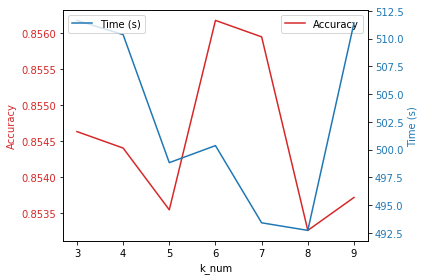

In [76]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k_num')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(k_num, total_acc_rate, color=color, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc=1)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Time (s)', color=color)  
ax2.plot(k_num, prediction_times, color=color, label='Time (s)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc=2)

fig.tight_layout() 
plt.show()

At k = 6, we can see that the accuracy rate is the highest as compared to the other k values, with a moderately lower amount of time taken to train the model.

Therefore, for this dataset, the K-NN model based on L1 distance achieved the best result when k = 6.

### 1.5.3 Building the K-NN Model Based on L2 / Euclidean Distance

Our second K-NN Model will be built based on Euclidean Distance, where we will also attempt to train the model based on k values = [3,4,5,6,7,8,9] to see which k value performs the best with the highest accuracy.

In [82]:
#create tensorflow session
feature_number = len(train_imgs[0])
label_number = len(train_labels[0])

#knn
k_num = [3,4,5,6,7,8,9]

x_data_train = tf.placeholder(shape=[None, feature_number], dtype=tf.float32)
y_data_train = tf.placeholder(shape=[None, label_number], dtype=tf.float32)
x_data_test = tf.placeholder(shape=[None, feature_number], dtype=tf.float32)

#components for distance
subtract = tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))
square = tf.square(subtract)

#euclidean distance
distance = tf.sqrt(tf.reduce_sum(square, axis=2))

In [83]:
config = tf.ConfigProto(device_count = {'GPU': 1})
sess = tf.Session(config=config)

prediction_times = []
total_acc_rate = []

for i in k_num:
    start_time = time.time()
    _, top_k_indices = tf.nn.top_k(tf.negative(distance), k=i)
    top_k_label = tf.gather(y_data_train, top_k_indices)
    sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
    prediction = tf.argmax(sum_up_predictions, axis=1)
    test_size = 17500
    test_batch_size = 5
    prediction_outcome_final = []
    for step in range(test_size // test_batch_size):
        test_offset = step * test_batch_size
        test_batch_data = test_imgs[test_offset:(test_offset + test_batch_size), :]
        prediction_outcome = sess.run(prediction, feed_dict={x_data_train: train_imgs,
                               x_data_test: test_batch_data,
                               y_data_train: train_labels})
        for result in prediction_outcome:
            prediction_outcome_final.append(result)
    accuracy = 0
    for pred, actual in zip(prediction_outcome_final, test_labels):
        if pred == actual:
            accuracy += 1
    elapsed_time = (time.time() - start_time)
    prediction_times.append(elapsed_time)
    acc_rate = accuracy / len(prediction_outcome_final)
    total_acc_rate.append(acc_rate)
    print('When k =', str(i), ', the accuracy is', acc_rate, "| Time Taken:", elapsed_time, 's')

When k = 3 , the accuracy is 0.8442857142857143 | Time Taken: 497.9618248939514 s
When k = 4 , the accuracy is 0.8488 | Time Taken: 504.4863700866699 s
When k = 5 , the accuracy is 0.8477714285714286 | Time Taken: 503.2424421310425 s
When k = 6 , the accuracy is 0.8475428571428572 | Time Taken: 523.4157299995422 s
When k = 7 , the accuracy is 0.8466285714285714 | Time Taken: 504.239031791687 s
When k = 8 , the accuracy is 0.8465714285714285 | Time Taken: 504.2150971889496 s
When k = 9 , the accuracy is 0.8440571428571428 | Time Taken: 508.6273424625397 s


### 1.5.4 Discussion on Results Obtained for the K-NN Model Based on L2 / Euclidean Distance

From the above, we can see that the model trained with k = 4 performed the best with accuracy rate of 0.849. To visualize the results obtained better, we will plot the accuracy rate and the time taken to train the model against the corresponding k value below:

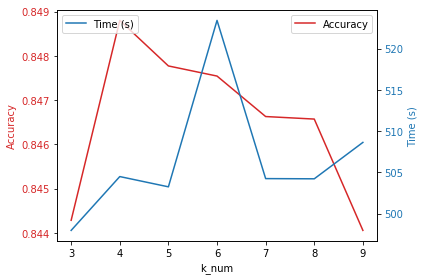

In [84]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k_num')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(k_num, total_acc_rate, color=color, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc=1)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Time (s)', color=color)  
ax2.plot(k_num, prediction_times, color=color, label='Time (s)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc=2)

fig.tight_layout() 
plt.show()

At k = 4, we can see that the accuracy rate is the highest as compared to the other k values, with a moderately lower amount of time taken to train the model.

Therefore, for this dataset, the K-NN model based on L2 distance achieved the best result when k = 4.

### 1.5.5 Building the K-NN Model Based on Cosine Similarity

Our third and last K-NN Model will be built based on Cosine Similarity, where we will also attempt to train the model based on k values = [3,4,5,6,7,8,9] to see which k value performs the best with the highest accuracy.

In [86]:
#create tensorflow session
feature_number = len(train_imgs[0])
label_number = len(train_labels[0])

#knn
k_num = [3,4,5,6,7,8,9]

x_data_train = tf.placeholder(shape=[None, feature_number], dtype=tf.float32)
y_data_train = tf.placeholder(shape=[None, label_number], dtype=tf.float32)
x_data_test = tf.placeholder(shape=[None, feature_number], dtype=tf.float32)

#cosine_similarity
X_norm = tf.sqrt(tf.reduce_sum(tf.square(x_data_train), axis=1))
Y_norm = tf.sqrt(tf.reduce_sum(tf.square(x_data_test), axis=1))
XY_norm = tf.multiply(X_norm, tf.expand_dims(Y_norm, 1))
XY = tf.reduce_sum(tf.multiply(x_data_train, x_data_test[:,None]), 2)
similarity = XY / XY_norm

In [87]:
config = tf.ConfigProto(device_count = {'GPU': 1})
sess = tf.Session(config=config)

prediction_times = []
total_acc_rate = []

for i in k_num:
    start_time = time.time()
    _, top_k_indices = tf.nn.top_k(similarity, k=i)
    top_k_label = tf.gather(y_data_train, top_k_indices)
    sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
    prediction = tf.argmax(sum_up_predictions, axis=1)
    test_size = 17500
    test_batch_size = 5
    prediction_outcome_final = []
    for step in range(test_size // test_batch_size):
        test_offset = step * test_batch_size
        test_batch_data = test_imgs[test_offset:(test_offset + test_batch_size), :]
        prediction_outcome = sess.run(prediction, feed_dict={x_data_train: train_imgs,
                               x_data_test: test_batch_data,
                               y_data_train: train_labels})
        for result in prediction_outcome:
            prediction_outcome_final.append(result)
    accuracy = 0
    for pred, actual in zip(prediction_outcome_final, test_labels):
        if pred == actual:
            accuracy += 1
    elapsed_time = (time.time() - start_time)
    prediction_times.append(elapsed_time)
    acc_rate = accuracy / len(prediction_outcome_final)
    total_acc_rate.append(acc_rate)
    print('When k =', str(i), ', the accuracy is', acc_rate, "| Time Taken:", elapsed_time, 's')

When k = 3 , the accuracy is 0.8539428571428571 | Time Taken: 478.9327917098999 s
When k = 4 , the accuracy is 0.8547428571428571 | Time Taken: 473.09335565567017 s
When k = 5 , the accuracy is 0.852 | Time Taken: 472.83398818969727 s
When k = 6 , the accuracy is 0.8526857142857143 | Time Taken: 478.01721024513245 s
When k = 7 , the accuracy is 0.8493142857142857 | Time Taken: 474.5225315093994 s
When k = 8 , the accuracy is 0.8496571428571429 | Time Taken: 474.7529501914978 s
When k = 9 , the accuracy is 0.8466285714285714 | Time Taken: 474.75885581970215 s


### 1.5.8 Discussion on Results Obtained for the K-NN Model Based on  Cosine Similarity

From the above, we can see that the model trained with k = 4 performed the best with accuracy rate of 0.855. To visualize the results obtained better, we will plot the accuracy rate and the time taken to train the model against the corresponding k value below:

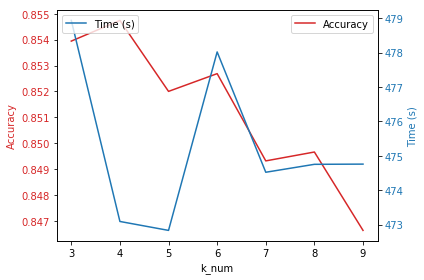

In [88]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k_num')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(k_num, total_acc_rate, color=color, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc=1)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Time (s)', color=color)  
ax2.plot(k_num, prediction_times, color=color, label='Time (s)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc=2)

fig.tight_layout() 
plt.show()

At k = 4, we can see that the accuracy rate is the highest as compared to the other k values, with a moderately lower amount of time taken to train the model.

Therefore, for this dataset, the K-NN model based on Cosine Similarity achieved the best result when k = 4.

# Objective 2a

In this section, we will be building various MLP models of different architectures with different number of hidden layers and hidden units. At the end of the model building, we will compare and discuss the results obtained for each model.

#### The following sections will be organised as follow:
1. Sections 2.0 and 2.1 will be describing pre-training processes such as loading packages, reading datasets and performance of data pre-processing.
2. Section 2.2 will be focusing on training a model with 0 hidden layer. In this section, we will also discuss on the number of epochs and batch size to be used to train all models to ensure consistency.
3. Section 2.3 will be focusing on training models with 1 hidden layer, with 16, 64 and 256 hidden units each.
4. Section 2.4 will be focusing on training models with 2 hidden layers, with 16, 64 and 256 hidden units each.
5. Section 2.5 will be focusing on training models with 5 hidden layers, with 16, 64 and 256 hidden units each.
6. Section 2.6 will be a discussion on the results obtained from the models built.

## 2.0 Loading Packages & Reading Datasets

Similar to the process in question 1 above, prior to building the MLP models, we will first load the necessary packages and read the train and test datasets.

In [348]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential                  
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization  
from keras.optimizers import SGD, Adagrad, RMSprop, Adam
import time

In [349]:
import pickle
with open("train_imgs.pkl","rb") as a:
    train_imgs = pickle.load(a)
with open("train_labels.pkl","rb") as b:
    train_labels = pickle.load(b)
with open("test_imgs.pkl","rb") as c:
    test_imgs = pickle.load(c)
with open("test_labels.pkl","rb") as d:
    test_labels = pickle.load(d)

## 2.1 Data Pre-processing

Additionally, the data pre-processing methods performed below is the same as the data pre-processing performed in question 1 above. 

First, we want to reshape the datasets to include four dimensions: Number of images, height of images, width of images, and number of channels.

In [350]:
img_x, img_y = 28, 28

train_imgs = train_imgs.reshape(train_imgs.shape[0], img_x, img_y, 1)
test_imgs = test_imgs.reshape(test_imgs.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

Next, we will normalize the input to be between [0, 1] as follow:

In [351]:
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

## 2.2 Training an MLP with Number of Hidden Layers Equals to 0

### 2.2.1 Discussion on the Configuration of the 0 Hidden Layer MLP Model

First, prior to training the MLP, we have to flatten our images from two dimensional 28x28 into a single dimension of 784. This is done via adding the Flatten layer in keras.

Next, since we are training our first MLP model without any hidden layers, the final layer of our model will only have 10 neurons with 'softmax' activation. Each neuron representing a score between 0 and 1 that corresponds to our model's confidence in assigning a particular class to our input. Since we have 10 classes, our final layer also has 10 neurons.

For this model and the following models, we will be using 'SGD' as our optimizer and 'sparse_categorical_crossentropy' as our loss function. 

In [135]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [136]:
model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 2.2.2 Discussion on Model Training Methodology: Optimizing the Number of Epochs and Batch Size

Once we have created our sequential model with the configuration of our required learning process, we are ready to train our 0 hidden layer MLP model. 

However, in order to optimize our model appropriately, we need to identify the optimal number of epochs and batch sizes (of each epoch) to be used. Therefore, we will create a function to iterate through a combination of number of epochs and batch sizes to train multiple models to obtain their corresponding results. The number of epochs and batch sizes to be used for training can be configured under 'configurations' below.

At the end of the training, we will plot the test accuracy and loss rate for each batch size against the number of epochs. The top model (in terms of accuracy) will also be highlighted at the end.

However, this optimization will only be performed for our 0 hidden layer model. Upon determining the optimal number of epochs and batch size to be used, the same configurations will be used to train the other models with hidden layers = [1, 2, 5] and hidden units  = [16, 64, 256]. This is to ensure consistency in our model training, such that we will be able to observe and explain the influence of the number of hidden layers and hidden units on the test accuracy across all models.

In [138]:
configurations = [
    {'epochs': [10,20,30,40,50,60],
    'batch_size': [16,32,48,64]}
]

def run_model(conf):
    prediction_times=[]
    test_accuracies=[]
    test_losses=[]
    train_accuracies=[]
    train_losses=[]
    for b in conf['batch_size']:
        for e in conf['epochs']:
            print('For Epoch:', str(e), 'and Batch Size:', str(b))
            fit = model.fit(train_imgs, train_labels, batch_size=b, epochs=e, validation_data = (test_imgs, test_labels))
            test_loss, test_acc = model.evaluate(test_imgs, test_labels)
            train_loss, train_acc = model.evaluate(train_imgs, train_labels)
            test_accuracies.append(test_acc)
            test_losses.append(test_loss)
            train_accuracies.append(train_acc)
            train_losses.append(train_loss)
            print('Test accuracy:', test_acc)
            print('Test loss:', test_loss, '\n')
    return test_accuracies, test_losses, train_accuracies, train_losses

for conf in configurations:
    test_accuracies, test_losses, train_accuracies, train_losses = \
        run_model(conf)

For Epoch: 10 and Batch Size: 16
Train on 35000 samples, validate on 17500 samples
Epoch 1/10
35000/35000 [==============================] - 10s 293us/step - loss: 0.5933 - acc: 0.8070 - val_loss: 0.5594 - val_acc: 0.8133
Epoch 2/10
35000/35000 [==============================] - 10s 273us/step - loss: 0.5369 - acc: 0.8230 - val_loss: 0.5269 - val_acc: 0.8230
Epoch 3/10
35000/35000 [==============================] - 9s 271us/step - loss: 0.5086 - acc: 0.8294 - val_loss: 0.5018 - val_acc: 0.8320
Epoch 4/10
35000/35000 [==============================] - 9s 264us/step - loss: 0.4905 - acc: 0.8341 - val_loss: 0.4936 - val_acc: 0.8344
Epoch 5/10
35000/35000 [==============================] - 9s 259us/step - loss: 0.4775 - acc: 0.8384 - val_loss: 0.4803 - val_acc: 0.8381
Epoch 6/10
35000/35000 [==============================] - 9s 270us/step - loss: 0.4674 - acc: 0.8412 - val_loss: 0.4704 - val_acc: 0.8410
Epoch 7/10
35000/35000 [==============================] - 9s 258us/step - loss: 0.4602 

35000/35000 [==============================] - 9s 264us/step - loss: 0.3641 - acc: 0.8726 - val_loss: 0.4279 - val_acc: 0.8516
Epoch 11/50
35000/35000 [==============================] - 9s 270us/step - loss: 0.3637 - acc: 0.8728 - val_loss: 0.4324 - val_acc: 0.8473
Epoch 12/50
35000/35000 [==============================] - 9s 257us/step - loss: 0.3637 - acc: 0.8718 - val_loss: 0.4243 - val_acc: 0.8545
Epoch 13/50
35000/35000 [==============================] - 9s 256us/step - loss: 0.3635 - acc: 0.8727 - val_loss: 0.4218 - val_acc: 0.8536
Epoch 14/50
35000/35000 [==============================] - 9s 264us/step - loss: 0.3631 - acc: 0.8720 - val_loss: 0.4252 - val_acc: 0.8531
Epoch 15/50
35000/35000 [==============================] - 9s 259us/step - loss: 0.3628 - acc: 0.8740 - val_loss: 0.4344 - val_acc: 0.8461
Epoch 16/50
35000/35000 [==============================] - 9s 256us/step - loss: 0.3628 - acc: 0.8746 - val_loss: 0.4239 - val_acc: 0.8536
Epoch 17/50
35000/35000 [==============

35000/35000 [==============================] - 5s 135us/step - loss: 0.3449 - acc: 0.8793 - val_loss: 0.4325 - val_acc: 0.8491
Epoch 3/20
35000/35000 [==============================] - 5s 136us/step - loss: 0.3450 - acc: 0.8778 - val_loss: 0.4271 - val_acc: 0.8545
Epoch 4/20
35000/35000 [==============================] - 5s 137us/step - loss: 0.3451 - acc: 0.8786 - val_loss: 0.4261 - val_acc: 0.8536
Epoch 5/20
35000/35000 [==============================] - 5s 136us/step - loss: 0.3450 - acc: 0.8777 - val_loss: 0.4308 - val_acc: 0.8509
Epoch 6/20
35000/35000 [==============================] - 5s 136us/step - loss: 0.3447 - acc: 0.8787 - val_loss: 0.4292 - val_acc: 0.8517
Epoch 7/20
35000/35000 [==============================] - 5s 136us/step - loss: 0.3447 - acc: 0.8788 - val_loss: 0.4268 - val_acc: 0.8533
Epoch 8/20
35000/35000 [==============================] - 5s 137us/step - loss: 0.3447 - acc: 0.8791 - val_loss: 0.4265 - val_acc: 0.8539
Epoch 9/20
35000/35000 [=====================

35000/35000 [==============================] - 5s 139us/step - loss: 0.3400 - acc: 0.8792 - val_loss: 0.4291 - val_acc: 0.8543
Epoch 25/50
35000/35000 [==============================] - 5s 137us/step - loss: 0.3400 - acc: 0.8808 - val_loss: 0.4295 - val_acc: 0.8543
Epoch 26/50
35000/35000 [==============================] - 5s 136us/step - loss: 0.3399 - acc: 0.8798 - val_loss: 0.4298 - val_acc: 0.8543
Epoch 27/50
35000/35000 [==============================] - 5s 137us/step - loss: 0.3400 - acc: 0.8808 - val_loss: 0.4324 - val_acc: 0.8521
Epoch 28/50
35000/35000 [==============================] - 5s 137us/step - loss: 0.3395 - acc: 0.8808 - val_loss: 0.4328 - val_acc: 0.8503
Epoch 29/50
35000/35000 [==============================] - 5s 149us/step - loss: 0.3399 - acc: 0.8804 - val_loss: 0.4302 - val_acc: 0.8537
Epoch 30/50
35000/35000 [==============================] - 5s 138us/step - loss: 0.3396 - acc: 0.8808 - val_loss: 0.4313 - val_acc: 0.8541
Epoch 31/50
35000/35000 [==============

35000/35000 [==============================] - 3s 94us/step - loss: 0.3356 - acc: 0.8819 - val_loss: 0.4319 - val_acc: 0.8534
Epoch 17/20
35000/35000 [==============================] - 3s 95us/step - loss: 0.3353 - acc: 0.8814 - val_loss: 0.4328 - val_acc: 0.8529
Epoch 18/20
35000/35000 [==============================] - 3s 97us/step - loss: 0.3353 - acc: 0.8822 - val_loss: 0.4320 - val_acc: 0.8537
Epoch 19/20
35000/35000 [==============================] - 3s 97us/step - loss: 0.3355 - acc: 0.8817 - val_loss: 0.4318 - val_acc: 0.8538
Epoch 20/20
35000/35000 [==============================] - 2s 61us/step
Test accuracy: 0.8544000000272478
Test loss: 0.4322453008106777 

For Epoch: 30 and Batch Size: 48
Train on 35000 samples, validate on 17500 samples
Epoch 1/30
35000/35000 [==============================] - 3s 93us/step - loss: 0.3353 - acc: 0.8826 - val_loss: 0.4333 - val_acc: 0.8521
Epoch 2/30
35000/35000 [==============================] - 3s 92us/step - loss: 0.3353 - acc: 0.8822 - 

35000/35000 [==============================] - 3s 93us/step - loss: 0.3330 - acc: 0.8827 - val_loss: 0.4366 - val_acc: 0.8523
Epoch 39/50
35000/35000 [==============================] - 3s 93us/step - loss: 0.3333 - acc: 0.8834 - val_loss: 0.4337 - val_acc: 0.8531
Epoch 40/50
35000/35000 [==============================] - 3s 93us/step - loss: 0.3331 - acc: 0.8824 - val_loss: 0.4365 - val_acc: 0.8528
Epoch 41/50
35000/35000 [==============================] - 3s 93us/step - loss: 0.3329 - acc: 0.8830 - val_loss: 0.4355 - val_acc: 0.8533
Epoch 42/50
35000/35000 [==============================] - 3s 93us/step - loss: 0.3332 - acc: 0.8831 - val_loss: 0.4346 - val_acc: 0.8529
Epoch 43/50
35000/35000 [==============================] - 3s 95us/step - loss: 0.3331 - acc: 0.8827 - val_loss: 0.4351 - val_acc: 0.8526
Epoch 44/50
35000/35000 [==============================] - 3s 93us/step - loss: 0.3332 - acc: 0.8830 - val_loss: 0.4362 - val_acc: 0.8535
Epoch 45/50
35000/35000 [=====================

Epoch 9/30
35000/35000 [==============================] - 3s 74us/step - loss: 0.3309 - acc: 0.8840 - val_loss: 0.4359 - val_acc: 0.8529
Epoch 10/30
35000/35000 [==============================] - 3s 73us/step - loss: 0.3308 - acc: 0.8834 - val_loss: 0.4357 - val_acc: 0.8527
Epoch 11/30
35000/35000 [==============================] - 3s 72us/step - loss: 0.3310 - acc: 0.8834 - val_loss: 0.4350 - val_acc: 0.8530
Epoch 12/30
35000/35000 [==============================] - 3s 72us/step - loss: 0.3309 - acc: 0.8836 - val_loss: 0.4360 - val_acc: 0.8526
Epoch 13/30
35000/35000 [==============================] - 2s 71us/step - loss: 0.3309 - acc: 0.8829 - val_loss: 0.4384 - val_acc: 0.8509
Epoch 14/30
35000/35000 [==============================] - 3s 73us/step - loss: 0.3308 - acc: 0.8839 - val_loss: 0.4352 - val_acc: 0.8530
Epoch 15/30
35000/35000 [==============================] - 3s 72us/step - loss: 0.3308 - acc: 0.8829 - val_loss: 0.4369 - val_acc: 0.8522
Epoch 16/30
35000/35000 [==========

35000/35000 [==============================] - 2s 69us/step - loss: 0.3294 - acc: 0.8844 - val_loss: 0.4379 - val_acc: 0.8526
Epoch 2/60
35000/35000 [==============================] - 2s 68us/step - loss: 0.3296 - acc: 0.8830 - val_loss: 0.4366 - val_acc: 0.8527
Epoch 3/60
35000/35000 [==============================] - 2s 69us/step - loss: 0.3296 - acc: 0.8836 - val_loss: 0.4367 - val_acc: 0.8530
Epoch 4/60
35000/35000 [==============================] - 2s 65us/step - loss: 0.3295 - acc: 0.8840 - val_loss: 0.4367 - val_acc: 0.8531
Epoch 5/60
35000/35000 [==============================] - 2s 68us/step - loss: 0.3297 - acc: 0.8831 - val_loss: 0.4366 - val_acc: 0.8534
Epoch 6/60
35000/35000 [==============================] - 2s 68us/step - loss: 0.3297 - acc: 0.8846 - val_loss: 0.4385 - val_acc: 0.8525
Epoch 7/60
35000/35000 [==============================] - 2s 68us/step - loss: 0.3295 - acc: 0.8840 - val_loss: 0.4368 - val_acc: 0.8529
Epoch 8/60
35000/35000 [============================

With the results obtained above, we will attempt to visualize the test accuracy and test loss for all models in the plot below. 

Please note that the secondary y-axis on the right (representing test loss) is on a different scale than the primary y-axis on the left (representing test accuracy). This is to allow us to visualize the rise and fall of each line plot more clearly based on their individual optimal ylim scaling.

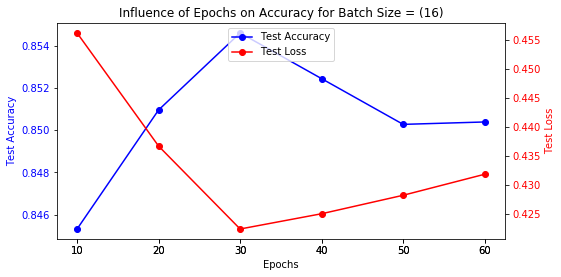

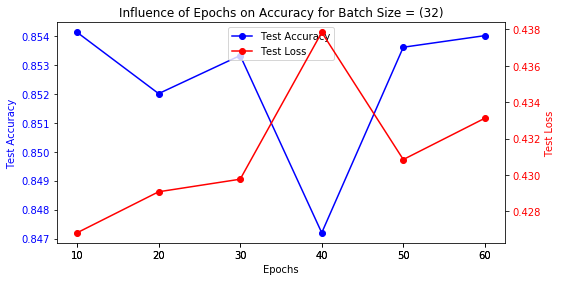

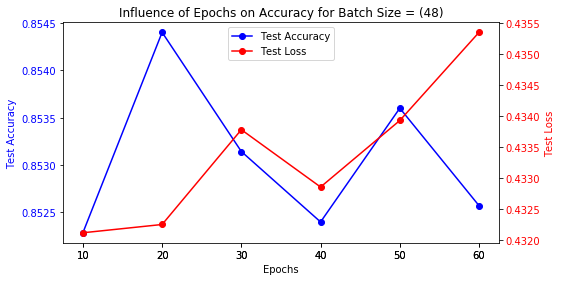

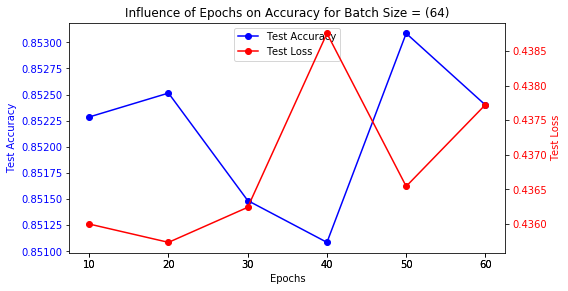

The configuration with the highest test accuracy is 
 epochs: 30 
 batch_size: 16 
 at 0.8546285714285714 
 The test loss is: 0.4224180657250541


In [140]:
def plot_batchsize_influence(conf, test_accuracies, test_losses):
    for i in range(len(conf['batch_size'])):
        fig = plt.figure(figsize=(8, 15))
        
        ax1 = fig.add_subplot(len(conf['batch_size']),1,i+1)
        
        color = 'b'
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Test Accuracy', color=color)
        ax1.plot(conf["epochs"], test_accuracies[i*len(conf['epochs']):(i+1)*len(conf['epochs'])], 'bo-', label="Test Accuracy")
        ax1.tick_params(axis='y', labelcolor=color)
        
        ax2 = fig.add_subplot(len(conf['batch_size']),1,i+1, sharex=ax1, frameon=False)

        color = 'r'
        ax2.set_ylabel('Test Loss', color=color)  
        ax2.plot(conf["epochs"], test_losses[i*len(conf['epochs']):(i+1)*len(conf['epochs'])], 'ro-', label="Test Loss")
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.yaxis.tick_right()
        ax2.yaxis.set_label_position("right")
        
        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax1.legend(h1+h2, l1+l2, loc='upper center')
        plt.title('Influence of Epochs on Accuracy for Batch Size = (%s)' % conf['batch_size'][i])
        fig.tight_layout() 
        plt.show()

import operator
index, value = max(enumerate(test_accuracies), key=operator.itemgetter(1))

for conf in configurations:
    plot_batchsize_influence(conf, test_accuracies, test_losses)

print('The configuration with the highest test accuracy is \n',
      'epochs:', configurations[0]['epochs'][index%len(configurations[0]['epochs'])], '\n',
     'batch_size:', configurations[0]['batch_size'][index//len(configurations[0]['epochs'])], '\n',
     'at', test_accuracies[index], '\n',
     'The test loss is:', test_losses[index])

### 2.2.3 Discussion on the Results Obtained for 0 Hidden Layer MLP

Based on the plots above, we can see that the model with the best test accuracy has epochs = 30 and batch size = 16. 

In general, as the number of epochs increases, the number of times the weights are updated via gradient descent increases too. However, as the number of epochs increases, it might lead to overfitting. Additionally, with a smaller number of batch size, the higher the number of iterations is needed to complete one epoch, and thus equating to more updates to the model. 

In this case, our best model has the smallest number of batch size at 16, which not only gives us the highest test accuracy, but also the lowest test loss amongst all other models. 

Next, in order to visualize how well the model fits the data, we will plot a comparison between training accuracy and test accuracy below.

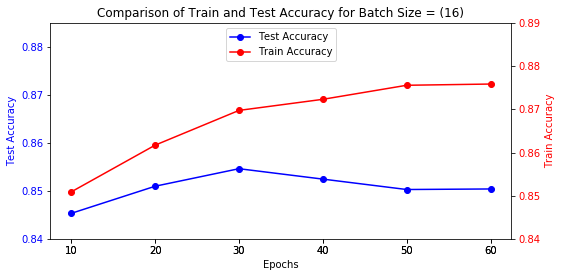

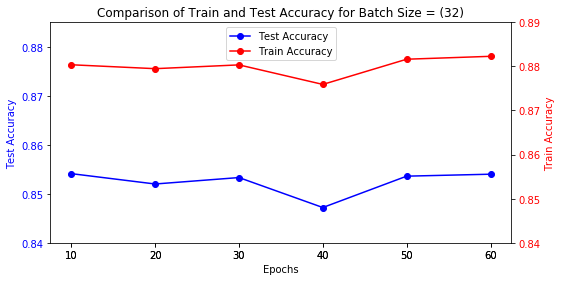

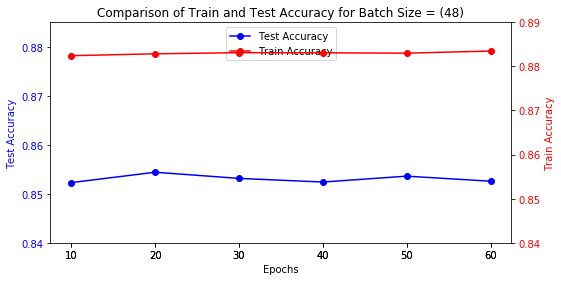

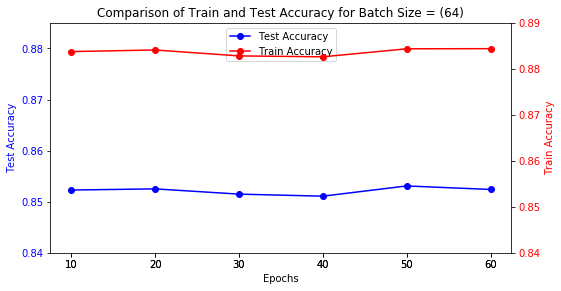

In [152]:
def plot_train_v_test(conf, test_accuracies, train_accuracies):
    for i in range(len(conf['batch_size'])):
        fig = plt.figure(figsize=(8, 15))
        
        ax1 = fig.add_subplot(len(conf['batch_size']),1,i+1)
        
        color = 'b'
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Test Accuracy', color=color)
        ax1.plot(conf["epochs"], test_accuracies[i*len(conf['epochs']):(i+1)*len(conf['epochs'])], 'bo-', label="Test Accuracy")
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.set_ylim(0.84, 0.885)
        
        ax2 = fig.add_subplot(len(conf['batch_size']),1,i+1, sharex=ax1, frameon=False)

        color = 'r'
        ax2.set_ylabel('Train Accuracy', color=color)  
        ax2.plot(conf["epochs"], train_accuracies[i*len(conf['epochs']):(i+1)*len(conf['epochs'])], 'ro-', label="Train Accuracy")
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.set_ylim(0.84, 0.89)
        ax2.yaxis.tick_right()
        ax2.yaxis.set_label_position("right")
        
        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax1.legend(h1+h2, l1+l2, loc='upper center')
        plt.title('Comparison of Train and Test Accuracy for Batch Size = (%s)' % conf['batch_size'][i])
        fig.tight_layout() 
        plt.show()

for conf in configurations:
    plot_train_v_test(conf, test_accuracies, train_accuracies)

As we can see from the above, in the first plot for batch size = 16, the test accuracy increases from epochs = 10 to epochs = 30. After 30 epochs, the test accuracy starts to fall and diverge away from the train accuracy. This shows that the model fits the data well when epochs = 30 and batch size = 16.

Since epochs = 30 and batch size = 16 performed the best for our 0 hidden layer model, we will be using the same configurations to train the other models with hidden layers = [1, 2, 5] and hidden units  = [16, 64, 256]. This is to ensure consistency in our model training, such that we will be able to observe and explain the influence of the number of hidden layers and hidden units on the test accuracy across all models.

## 2.3 Training 1 Hidden Layer MLP Models

In order for us to consolidate the test accuracy and test loss for each of the 1 hidden layer model, we will append each result in the following lists:

In [53]:
onelayer_acc=[]
onelayer_loss=[]

### 2.3.1 MLP Model with 1 Hidden Layer and 16 Hidden Units

In [54]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_43 (Dense)             (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
epochs = 30
batch_size = 16
fit = model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_data = (test_imgs, test_labels))
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
onelayer_acc.append(test_acc)
onelayer_loss.append(test_loss)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss, '\n')

Train on 35000 samples, validate on 17500 samples
Epoch 1/30
35000/35000 [==============================] - 10s 292us/step - loss: 0.8248 - acc: 0.7304 - val_loss: 0.5893 - val_acc: 0.7970
Epoch 2/30
35000/35000 [==============================] - 10s 294us/step - loss: 0.5393 - acc: 0.8126 - val_loss: 0.5591 - val_acc: 0.8055
Epoch 3/30
35000/35000 [==============================] - 11s 313us/step - loss: 0.4950 - acc: 0.8276 - val_loss: 0.4921 - val_acc: 0.8285
Epoch 4/30
35000/35000 [==============================] - 10s 277us/step - loss: 0.4712 - acc: 0.8364 - val_loss: 0.5266 - val_acc: 0.8113
Epoch 5/30
35000/35000 [==============================] - 10s 274us/step - loss: 0.4553 - acc: 0.8420 - val_loss: 0.4834 - val_acc: 0.8324
Epoch 6/30
35000/35000 [==============================] - 10s 282us/step - loss: 0.4436 - acc: 0.8462 - val_loss: 0.4578 - val_acc: 0.8424
Epoch 7/30
35000/35000 [==============================] - 10s 288us/step - loss: 0.4329 - acc: 0.8495 - val_loss: 0.

### 2.3.2 MLP Model with 1 Hidden Layer and 64 Hidden Units

In [57]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_45 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
epochs = 30
batch_size = 16
fit = model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_data = (test_imgs, test_labels))
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
onelayer_acc.append(test_acc)
onelayer_loss.append(test_loss)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss, '\n')

Train on 35000 samples, validate on 17500 samples
Epoch 1/30
35000/35000 [==============================] - 10s 284us/step - loss: 0.7352 - acc: 0.7564 - val_loss: 0.5455 - val_acc: 0.8126
Epoch 2/30
35000/35000 [==============================] - 10s 278us/step - loss: 0.5110 - acc: 0.8240 - val_loss: 0.5145 - val_acc: 0.8138
Epoch 3/30
35000/35000 [==============================] - 10s 274us/step - loss: 0.4661 - acc: 0.8370 - val_loss: 0.4546 - val_acc: 0.8402
Epoch 4/30
35000/35000 [==============================] - 9s 271us/step - loss: 0.4403 - acc: 0.8448 - val_loss: 0.4400 - val_acc: 0.8437
Epoch 5/30
35000/35000 [==============================] - 10s 275us/step - loss: 0.4200 - acc: 0.8535 - val_loss: 0.4278 - val_acc: 0.8489
Epoch 6/30
35000/35000 [==============================] - 10s 286us/step - loss: 0.4053 - acc: 0.8573 - val_loss: 0.4104 - val_acc: 0.8565
Epoch 7/30
35000/35000 [==============================] - 10s 274us/step - loss: 0.3948 - acc: 0.8625 - val_loss: 0.4

### 2.3.3 MLP Model with 1 Hidden Layer and 256 Hidden Units

In [60]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_47 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
epochs = 30
batch_size = 16
fit = model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_data = (test_imgs, test_labels))
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
onelayer_acc.append(test_acc)
onelayer_loss.append(test_loss)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss, '\n')

Train on 35000 samples, validate on 17500 samples
Epoch 1/30
35000/35000 [==============================] - 12s 349us/step - loss: 0.7121 - acc: 0.7669 - val_loss: 0.6000 - val_acc: 0.7854
Epoch 2/30
35000/35000 [==============================] - 10s 300us/step - loss: 0.5022 - acc: 0.8266 - val_loss: 0.4781 - val_acc: 0.8335
Epoch 3/30
35000/35000 [==============================] - 10s 292us/step - loss: 0.4593 - acc: 0.8407 - val_loss: 0.4723 - val_acc: 0.8360
Epoch 4/30
35000/35000 [==============================] - 10s 285us/step - loss: 0.4321 - acc: 0.8481 - val_loss: 0.4774 - val_acc: 0.8374
Epoch 5/30
35000/35000 [==============================] - 10s 284us/step - loss: 0.4141 - acc: 0.8554 - val_loss: 0.4193 - val_acc: 0.8546
Epoch 6/30
35000/35000 [==============================] - 10s 289us/step - loss: 0.3988 - acc: 0.8612 - val_loss: 0.4149 - val_acc: 0.8543
Epoch 7/30
35000/35000 [==============================] - 10s 295us/step - loss: 0.3852 - acc: 0.8639 - val_loss: 0.

## 2.4 Training 2 Hidden Layers MLP Models

In order for us to consolidate the test accuracy and test loss for each of the 2 hidden layers model, we will append each result in the following lists:

In [29]:
twolayer_acc=[]
twolayer_loss=[]

### 2.4.1 MLP Model with 2 Hidden Layers and 16 Hidden Units

In [30]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
epochs = 30
batch_size = 16
fit = model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_data = (test_imgs, test_labels))
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
twolayer_acc.append(test_acc)
twolayer_loss.append(test_loss)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss, '\n')

Train on 35000 samples, validate on 17500 samples
Epoch 1/30
35000/35000 [==============================] - 10s 289us/step - loss: 0.9092 - acc: 0.6784 - val_loss: 0.6265 - val_acc: 0.7885
Epoch 2/30
35000/35000 [==============================] - 10s 275us/step - loss: 0.5515 - acc: 0.8072 - val_loss: 0.5230 - val_acc: 0.8206
Epoch 3/30
35000/35000 [==============================] - 10s 281us/step - loss: 0.4955 - acc: 0.8233 - val_loss: 0.4874 - val_acc: 0.8298
Epoch 4/30
35000/35000 [==============================] - 10s 285us/step - loss: 0.4668 - acc: 0.8354 - val_loss: 0.4502 - val_acc: 0.8412
Epoch 5/30
35000/35000 [==============================] - 10s 293us/step - loss: 0.4467 - acc: 0.8408 - val_loss: 0.4731 - val_acc: 0.8336
Epoch 6/30
35000/35000 [==============================] - 11s 306us/step - loss: 0.4316 - acc: 0.8473 - val_loss: 0.4432 - val_acc: 0.8447
Epoch 7/30
35000/35000 [==============================] - 10s 296us/step - loss: 0.4216 - acc: 0.8499 - val_loss: 0.

### 2.4.2 MLP Model with 2 Hidden Layers and 64 Hidden Units

In [33]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
epochs = 30
batch_size = 16
fit = model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_data = (test_imgs, test_labels))
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
twolayer_acc.append(test_acc)
twolayer_loss.append(test_loss)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss, '\n')

Train on 35000 samples, validate on 17500 samples
Epoch 1/30
35000/35000 [==============================] - 11s 319us/step - loss: 0.7410 - acc: 0.7482 - val_loss: 0.5376 - val_acc: 0.8099
Epoch 2/30
35000/35000 [==============================] - 10s 298us/step - loss: 0.4978 - acc: 0.8238 - val_loss: 0.4857 - val_acc: 0.8283
Epoch 3/30
35000/35000 [==============================] - 10s 298us/step - loss: 0.4522 - acc: 0.8406 - val_loss: 0.4495 - val_acc: 0.8426
Epoch 4/30
35000/35000 [==============================] - 10s 294us/step - loss: 0.4234 - acc: 0.8493 - val_loss: 0.4630 - val_acc: 0.8292
Epoch 5/30
35000/35000 [==============================] - 11s 302us/step - loss: 0.4034 - acc: 0.8559 - val_loss: 0.4069 - val_acc: 0.8546
Epoch 6/30
35000/35000 [==============================] - 11s 301us/step - loss: 0.3873 - acc: 0.8609 - val_loss: 0.3960 - val_acc: 0.8605
Epoch 7/30
35000/35000 [==============================] - 11s 307us/step - loss: 0.3747 - acc: 0.8639 - val_loss: 0.

### 2.4.3 MLP Model with 2 Hidden Layers and 256 Hidden Units

In [36]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
epochs = 30
batch_size = 16
fit = model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_data = (test_imgs, test_labels))
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
twolayer_acc.append(test_acc)
twolayer_loss.append(test_loss)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss, '\n')

Train on 35000 samples, validate on 17500 samples
Epoch 1/30
35000/35000 [==============================] - 12s 347us/step - loss: 0.7004 - acc: 0.7679 - val_loss: 0.5214 - val_acc: 0.8194
Epoch 2/30
35000/35000 [==============================] - 11s 314us/step - loss: 0.4805 - acc: 0.8294 - val_loss: 0.4681 - val_acc: 0.8341
Epoch 3/30
35000/35000 [==============================] - 11s 322us/step - loss: 0.4316 - acc: 0.8473 - val_loss: 0.4610 - val_acc: 0.8380
Epoch 4/30
35000/35000 [==============================] - 11s 311us/step - loss: 0.4037 - acc: 0.8569 - val_loss: 0.4097 - val_acc: 0.8539
Epoch 5/30
35000/35000 [==============================] - 11s 306us/step - loss: 0.3801 - acc: 0.8649 - val_loss: 0.4190 - val_acc: 0.8513
Epoch 6/30
35000/35000 [==============================] - 11s 315us/step - loss: 0.3622 - acc: 0.8712 - val_loss: 0.3969 - val_acc: 0.8578
Epoch 7/30
35000/35000 [==============================] - 11s 310us/step - loss: 0.3474 - acc: 0.8755 - val_loss: 0.

## 2.5 Training 5 Hidden Layers MLP Models

In order for us to consolidate the test accuracy and test loss for each of the 1 hidden layer model, we will append each result in the following lists:

In [39]:
fivelayer_acc = []
fivelayer_loss =[]

### 2.5.1 MLP Model with 5 Hidden Layers and 16 Hidden Units

In [40]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_23 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_24 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_25 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_26 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                170       
Total para

In [41]:
model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
epochs = 30
batch_size = 16
fit = model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_data = (test_imgs, test_labels))
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
fivelayer_acc.append(test_acc)
fivelayer_loss.append(test_loss)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss, '\n')

Train on 35000 samples, validate on 17500 samples
Epoch 1/30
35000/35000 [==============================] - 14s 396us/step - loss: 1.3241 - acc: 0.4925 - val_loss: 0.6889 - val_acc: 0.7353
Epoch 2/30
35000/35000 [==============================] - 12s 356us/step - loss: 0.6295 - acc: 0.7682 - val_loss: 0.5512 - val_acc: 0.8042
Epoch 3/30
35000/35000 [==============================] - 13s 364us/step - loss: 0.5399 - acc: 0.8082 - val_loss: 0.5216 - val_acc: 0.8141
Epoch 4/30
35000/35000 [==============================] - 12s 352us/step - loss: 0.4971 - acc: 0.8229 - val_loss: 0.4801 - val_acc: 0.8303
Epoch 5/30
35000/35000 [==============================] - 12s 355us/step - loss: 0.4663 - acc: 0.8335 - val_loss: 0.5231 - val_acc: 0.8189
Epoch 6/30
35000/35000 [==============================] - 13s 367us/step - loss: 0.4450 - acc: 0.8421 - val_loss: 0.4391 - val_acc: 0.8440
Epoch 7/30
35000/35000 [==============================] - 13s 364us/step - loss: 0.4297 - acc: 0.8458 - val_loss: 0.

### 2.5.2 MLP Model with 5 Hidden Layers and 64 Hidden Units

In [43]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                650       
Total para

In [44]:
model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
epochs = 30
batch_size = 16
fit = model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_data = (test_imgs, test_labels))
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
fivelayer_acc.append(test_acc)
fivelayer_loss.append(test_loss)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss, '\n')

Train on 35000 samples, validate on 17500 samples
Epoch 1/30
35000/35000 [==============================] - 13s 384us/step - loss: 0.8497 - acc: 0.7015 - val_loss: 0.5705 - val_acc: 0.7910
Epoch 2/30
35000/35000 [==============================] - 12s 352us/step - loss: 0.5097 - acc: 0.8169 - val_loss: 0.4684 - val_acc: 0.8339
Epoch 3/30
35000/35000 [==============================] - 13s 359us/step - loss: 0.4464 - acc: 0.8372 - val_loss: 0.4239 - val_acc: 0.8463
Epoch 4/30
35000/35000 [==============================] - 12s 353us/step - loss: 0.4136 - acc: 0.8490 - val_loss: 0.4220 - val_acc: 0.8485
Epoch 5/30
35000/35000 [==============================] - 13s 367us/step - loss: 0.3909 - acc: 0.8554 - val_loss: 0.3919 - val_acc: 0.8575
Epoch 6/30
35000/35000 [==============================] - 13s 370us/step - loss: 0.3712 - acc: 0.8632 - val_loss: 0.3909 - val_acc: 0.8608
Epoch 7/30
35000/35000 [==============================] - 13s 363us/step - loss: 0.3569 - acc: 0.8690 - val_loss: 0.

### 2.5.3 MLP Model with 5 Hidden Layers and 256 Hidden Units

In [46]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_35 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_36 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_38 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_39 (Dense)             (None, 10)                2570      
Total para

In [47]:
model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
epochs = 30
batch_size = 16
fit = model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_data = (test_imgs, test_labels))
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
fivelayer_acc.append(test_acc)
fivelayer_loss.append(test_loss)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss, '\n')

Train on 35000 samples, validate on 17500 samples
Epoch 1/30
35000/35000 [==============================] - 15s 431us/step - loss: 0.7650 - acc: 0.7281 - val_loss: 0.5308 - val_acc: 0.8091
Epoch 2/30
35000/35000 [==============================] - 15s 415us/step - loss: 0.4704 - acc: 0.8301 - val_loss: 0.4396 - val_acc: 0.8406
Epoch 3/30
35000/35000 [==============================] - 14s 407us/step - loss: 0.4125 - acc: 0.8503 - val_loss: 0.4829 - val_acc: 0.8262
Epoch 4/30
35000/35000 [==============================] - 13s 386us/step - loss: 0.3784 - acc: 0.8609 - val_loss: 0.4121 - val_acc: 0.8490
Epoch 5/30
35000/35000 [==============================] - 14s 396us/step - loss: 0.3539 - acc: 0.8697 - val_loss: 0.3823 - val_acc: 0.8603
Epoch 6/30
35000/35000 [==============================] - 13s 373us/step - loss: 0.3345 - acc: 0.8775 - val_loss: 0.3783 - val_acc: 0.8635
Epoch 7/30
35000/35000 [==============================] - 13s 374us/step - loss: 0.3189 - acc: 0.8829 - val_loss: 0.

## 2.6 Discussion on Results Obtained

The results obtained above can be summarised in the table below:

### 2.6.1 Summary of Result of MLP Model with 0 Hidden Layer

The configuration of the MLP Model with 0 Hidden Layer with the highest test accuracy is  
epochs: 30  
batch_size: 16  
The test accuracy is: 0.8546285714285714  
The test loss is: 0.4224180657250541  

### 2.6.2 Summary of Results of MLP Models with 1, 2 and 5 Hidden Layers and 16 , 64, 256 Hidden Units

The results of all MLP Models with 1, 2 and 5 Hidden Layers and 16 , 64, 256 Hidden Units, with epochs = 30 and batch size = 16, are indicated in the table below:

In [324]:
table_val = np.vstack((onelayer_acc, twolayer_acc, fivelayer_acc))


table_ind = np.asarray([["1 Hidden Layer"],
                    ["2 Hidden Layers"],
                    ["5 Hidden Layers"]])

table_disp = np.hstack((table_ind, table_val))

# Setting List View in Tabular Format
class ListTable(list):       
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

table = ListTable()
table.append(["Number of Layers", "16 Units", "64 Units", "1256 Units"])
for i in range(3):
    table.append(table_disp[i])

table

Number of Layers,16 Units,64 Units,1256 Units
1 Hidden Layer,0.8667428571428571,0.8752,0.8762857142584665
2 Hidden Layers,0.8568571428843907,0.8768571428843907,0.8889714285305568
5 Hidden Layers,0.8602857143265861,0.8797142857415335,0.8898285714013235


### 2.6.3 Discussion of Results Observed for All MLP Models

#### Influence of Number of Hidden Units on Test Accuracy 
Based on the results obtained, we can deduce that for the same number of hidden layers in a model, an increase in the number of hidden units leads to an increase in the model performance on test accuracy. In order to visualize this better, please refer to the plot of the test accuracy score against the number of hidden units on this dataset for each 1, 2 and 5 hidden layers models:

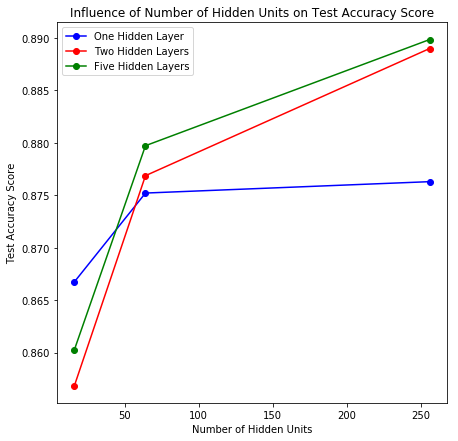

In [344]:
units = [16, 64, 256]

plt.figure(figsize=(7, 7))

plt.plot(units, onelayer_acc, 'bo-', label="One Hidden Layer")
plt.plot(units, twolayer_acc, 'ro-', label="Two Hidden Layers")
plt.plot(units, fivelayer_acc, 'go-', label="Five Hidden Layers")
plt.xlabel("Number of Hidden Units")
plt.ylabel("Test Accuracy Score")
plt.legend()
plt.title("Influence of Number of Hidden Units on Test Accuracy Score")
plt.show()

When the number of hidden units is small, the models lack the ability to learn with higher complexity, to distinguish distinct differences between all 10 classes. However, as the number of hidden units increases, the model gains the ability to learn more complex representations. However, if we increase the number of hidden units further, we could face a situation where it would do little to increase the test accuracy. Although the large number of hidden units may allow the training data to be fitted very well in the MLP model, it would most likely result in overfitting, where the model may fail to generalize to any new observations / data.

#### Influence of Number of Hidden Layers on Test Accuracy 
Similarly, based on the visualization above, we can see that in general, MLP models that have more hidden layers tend to perform better. With a greater number of layers, the model increases in its capacity to learn more complex representations and thus potentially allow for better performance. 

# Objective 2b

## 3.0 Overview on Best MLP Model Obtained in 2a

Based on the results obtained above, the best MLP model has 5 hidden layers with 256 hidden units. In the following sections, we will review and evaluate the effect on the performance based on the following different optimizers:  
  
3.1 Hidden Layers = 5 | Hidden Units = 256 | Optimizer = SGD with Momentum = 0.9  
3.2 Hidden Layers = 5 | Hidden Units = 256 | Optimizer = SGD with Nesterov Momentum  
3.3 Hidden Layers = 5 | Hidden Units = 256 | Optimizer = AdaGrad  
3.4 Hidden Layers = 5 | Hidden Units = 256 | Optimizer = RMSProp  
3.5 Hidden Layers = 5 | Hidden Units = 256 | Optimizer = ADAM  

In [345]:
from keras.optimizers import SGD, Adagrad, RMSprop, Adam

## 3.1 Hidden Layers = 5 | Hidden Units = 256 | Optimizer = SGD with Momentum = 0.9

In [374]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_64 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_324 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_325 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_326 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_327 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_328 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_329 (Dense)            (None, 10)                2570      
Total para

In [375]:
model.compile(optimizer=SGD(momentum=0.9), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [373]:
epochs = 30
batch_size = 16
fit = model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_data = (test_imgs, test_labels))
sgdmom_test_loss, sgdmom_test_acc = model.evaluate(test_imgs, test_labels)
sgdmom_train_loss, sgdmom_train_acc = model.evaluate(train_imgs, train_labels)
print('Test accuracy:', sgdmom_test_acc)
print('Test loss:', sgdmom_test_loss)

Train on 35000 samples, validate on 17500 samples
Epoch 1/30
35000/35000 [==============================] - 24s 680us/step - loss: 0.6064 - acc: 0.7781 - val_loss: 0.4876 - val_acc: 0.8190
Epoch 2/30
35000/35000 [==============================] - 19s 542us/step - loss: 0.4324 - acc: 0.8422 - val_loss: 0.4403 - val_acc: 0.8419
Epoch 3/30
35000/35000 [==============================] - 23s 651us/step - loss: 0.3874 - acc: 0.8580 - val_loss: 0.3982 - val_acc: 0.8538
Epoch 4/30
35000/35000 [==============================] - 26s 736us/step - loss: 0.3572 - acc: 0.8700 - val_loss: 0.3624 - val_acc: 0.8665
Epoch 5/30
35000/35000 [==============================] - 21s 598us/step - loss: 0.3379 - acc: 0.8761 - val_loss: 0.3585 - val_acc: 0.8716
Epoch 6/30
35000/35000 [==============================] - 22s 626us/step - loss: 0.3207 - acc: 0.8815 - val_loss: 0.3595 - val_acc: 0.8697
Epoch 7/30
35000/35000 [==============================] - 21s 601us/step - loss: 0.3078 - acc: 0.8857 - val_loss: 0.

## 3.2 Hidden Layers = 5 | Hidden Units = 256 | Optimizer = SGD with Nesterov Momentum

In [358]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_58 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_288 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_289 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_290 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_291 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_292 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_293 (Dense)            (None, 10)                2570      
Total para

In [359]:
model.compile(optimizer=SGD(nesterov=True), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [360]:
epochs = 30
batch_size = 16
fit = model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_data = (test_imgs, test_labels))
sgdnes_test_loss, sgdnes_test_acc = model.evaluate(test_imgs, test_labels)
sgdnes_train_loss, sgdnes_train_acc = model.evaluate(train_imgs, train_labels)
print('Test accuracy:', sgdnes_test_acc)
print('Test loss:', sgdnes_test_loss)

Train on 35000 samples, validate on 17500 samples
Epoch 1/30
35000/35000 [==============================] - 30s 858us/step - loss: 0.7593 - acc: 0.7358 - val_loss: 0.5624 - val_acc: 0.7818
Epoch 2/30
35000/35000 [==============================] - 25s 701us/step - loss: 0.4724 - acc: 0.8294 - val_loss: 0.4421 - val_acc: 0.8418
Epoch 3/30
35000/35000 [==============================] - 25s 719us/step - loss: 0.4129 - acc: 0.8485 - val_loss: 0.4680 - val_acc: 0.8265
Epoch 4/30
35000/35000 [==============================] - 28s 792us/step - loss: 0.3786 - acc: 0.8614 - val_loss: 0.4004 - val_acc: 0.8482
Epoch 5/30
35000/35000 [==============================] - 24s 683us/step - loss: 0.3529 - acc: 0.8696 - val_loss: 0.3784 - val_acc: 0.8621
Epoch 6/30
35000/35000 [==============================] - 24s 696us/step - loss: 0.3347 - acc: 0.8755 - val_loss: 0.3788 - val_acc: 0.8607
Epoch 7/30
35000/35000 [==============================] - 24s 693us/step - loss: 0.3206 - acc: 0.8807 - val_loss: 0.

## 3.3 Hidden Layers = 5 | Hidden Units = 256 | Optimizer = AdaGrad

In [361]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_59 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_294 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_295 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_296 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_297 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_298 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_299 (Dense)            (None, 10)                2570      
Total para

In [362]:
model.compile(optimizer=Adagrad(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [363]:
epochs = 30
batch_size = 16
fit = model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_data = (test_imgs, test_labels))
adagrad_test_loss, adagrad_test_acc = model.evaluate(test_imgs, test_labels)
adagrad_train_loss, adagrad_train_acc = model.evaluate(train_imgs, train_labels)
print('Test accuracy:', adagrad_test_acc)
print('Test loss:', adagrad_test_loss)

Train on 35000 samples, validate on 17500 samples
Epoch 1/30
35000/35000 [==============================] - 30s 871us/step - loss: 0.5456 - acc: 0.7961 - val_loss: 0.4070 - val_acc: 0.8518
Epoch 2/30
35000/35000 [==============================] - 23s 652us/step - loss: 0.3701 - acc: 0.8619 - val_loss: 0.3662 - val_acc: 0.8654
Epoch 3/30
35000/35000 [==============================] - 26s 741us/step - loss: 0.3265 - acc: 0.8786 - val_loss: 0.3556 - val_acc: 0.8681
Epoch 4/30
35000/35000 [==============================] - 28s 793us/step - loss: 0.2992 - acc: 0.8894 - val_loss: 0.3330 - val_acc: 0.8793
Epoch 5/30
35000/35000 [==============================] - 29s 816us/step - loss: 0.2788 - acc: 0.8964 - val_loss: 0.3343 - val_acc: 0.8766
Epoch 6/30
35000/35000 [==============================] - 29s 830us/step - loss: 0.2620 - acc: 0.9018 - val_loss: 0.3222 - val_acc: 0.8845
Epoch 7/30
35000/35000 [==============================] - 25s 710us/step - loss: 0.2461 - acc: 0.9082 - val_loss: 0.

## 3.4 Hidden Layers = 5 | Hidden Units = 256 | Optimizer = RMSProp

In [417]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_73 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_369 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_370 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_371 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_372 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_373 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_374 (Dense)            (None, 10)                2570      
Total para

In [418]:
model.compile(optimizer=RMSprop(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [419]:
epochs = 30
batch_size = 16
fit = model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_data = (test_imgs, test_labels))
rmsprop_test_loss, rmsprop_test_acc = model.evaluate(test_imgs, test_labels)
rmsprop_train_loss, rmsprop_train_acc = model.evaluate(train_imgs, train_labels)
print('Test accuracy:', rmsprop_test_acc)
print('Test loss:', rmsprop_test_loss)

Train on 35000 samples, validate on 17500 samples
Epoch 1/30
35000/35000 [==============================] - 32s 906us/step - loss: 0.6445 - acc: 0.7741 - val_loss: 0.5389 - val_acc: 0.8370
Epoch 2/30
35000/35000 [==============================] - 25s 703us/step - loss: 0.5842 - acc: 0.8162 - val_loss: 0.7784 - val_acc: 0.8175
Epoch 3/30
35000/35000 [==============================] - 25s 722us/step - loss: 0.5962 - acc: 0.8252 - val_loss: 0.8929 - val_acc: 0.8126
Epoch 4/30
35000/35000 [==============================] - 27s 758us/step - loss: 0.5925 - acc: 0.8301 - val_loss: 0.5902 - val_acc: 0.8354
Epoch 5/30
35000/35000 [==============================] - 26s 753us/step - loss: 0.6059 - acc: 0.8343 - val_loss: 0.9503 - val_acc: 0.7298
Epoch 6/30
35000/35000 [==============================] - 29s 818us/step - loss: 0.6228 - acc: 0.8347 - val_loss: 0.6322 - val_acc: 0.8381
Epoch 7/30
35000/35000 [==============================] - 27s 760us/step - loss: 0.6227 - acc: 0.8329 - val_loss: 0.

## 3.5 Hidden Layers = 5 | Hidden Units = 256 | Optimizer = ADAM

In [367]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_61 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_306 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_307 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_308 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_309 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_310 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_311 (Dense)            (None, 10)                2570      
Total para

In [368]:
model.compile(optimizer=Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [369]:
epochs = 30
batch_size = 16
fit = model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_data = (test_imgs, test_labels))
adam_test_loss, adam_test_acc = model.evaluate(test_imgs, test_labels)
adam_train_loss, adam_train_acc = model.evaluate(train_imgs, train_labels)
print('Test accuracy:', adam_test_acc)
print('Test loss:', adam_test_loss)

Train on 35000 samples, validate on 17500 samples
Epoch 1/30
35000/35000 [==============================] - 33s 937us/step - loss: 0.5666 - acc: 0.7942 - val_loss: 0.4251 - val_acc: 0.8419
Epoch 2/30
35000/35000 [==============================] - 27s 773us/step - loss: 0.4269 - acc: 0.8465 - val_loss: 0.4220 - val_acc: 0.8490
Epoch 3/30
35000/35000 [==============================] - 29s 842us/step - loss: 0.3865 - acc: 0.8612 - val_loss: 0.4750 - val_acc: 0.8492
Epoch 4/30
35000/35000 [==============================] - 30s 861us/step - loss: 0.3602 - acc: 0.8698 - val_loss: 0.3781 - val_acc: 0.8709
Epoch 5/30
35000/35000 [==============================] - 35s 1ms/step - loss: 0.3393 - acc: 0.8777 - val_loss: 0.3791 - val_acc: 0.8601
Epoch 6/30
35000/35000 [==============================] - 29s 825us/step - loss: 0.3189 - acc: 0.8828 - val_loss: 0.3839 - val_acc: 0.8707
Epoch 7/30
35000/35000 [==============================] - 25s 706us/step - loss: 0.3069 - acc: 0.8882 - val_loss: 0.36

## 3.6 Discussion on Observation of Results

### 3.6.1 Summary of Results for All Optimizers

The table and plot below shows the results of Test Accuracy and Test Loss obtained for each of the optimizer based on the following identical configurations:
1. 30 Epochs  
2. 16 Batch Size  
3. 5 Hidden Layers  
4. 256 Hidden Units

In [604]:
table_val_acc = np.vstack((sgdmom_test_acc, sgdnes_test_acc, adagrad_test_acc, rmsprop_test_acc, adam_test_acc))

table_val_loss = np.vstack((sgdmom_test_loss, sgdnes_test_loss, adagrad_test_loss, rmsprop_test_loss, adam_test_loss))


table_ind = np.asarray([["SGD w/ Momentum = 0.9"],
                    ["SGD w/ Nesterov Momentum"],
                    ["Adagrad"],
                    ["RMSProp"],
                    ["ADAM"]])

table_disp = np.hstack((table_ind, table_val_acc, table_val_loss))

# Setting List View in Tabular Format
class ListTable(list):       
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

table = ListTable()
table.append(["Optimizer", "Test Accuracy", "Test Loss"])
for i in range(5):
    table.append(table_disp[i])

table

Optimizer,Test Accuracy,Test Loss
SGD w/ Momentum = 0.9,0.8868571428571429,0.37357512125968934
SGD w/ Nesterov Momentum,0.874685714326586,0.4098485846672739
Adagrad,0.8918857142448425,0.4949432906942708
RMSProp,0.535885714326586,1.8036414517811366
ADAM,0.8925714286123003,0.3724580265930721


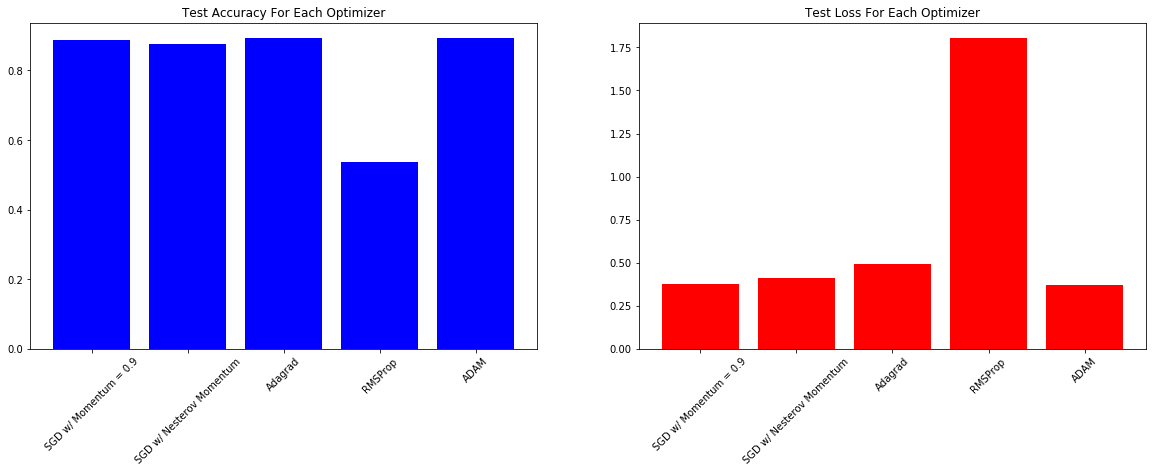

In [682]:
x = ['SGD w/ Momentum = 0.9','SGD w/ Nesterov Momentum','Adagrad','RMSProp','ADAM']
all_acc = [sgdmom_test_acc, sgdnes_test_acc, adagrad_test_acc, rmsprop_test_acc, adam_test_acc]
all_loss = [sgdmom_test_loss, sgdnes_test_loss, adagrad_test_loss, rmsprop_test_loss, adam_test_loss]

plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.bar(x, all_acc, color="b")
plt.xticks(rotation=45)
plt.title('Test Accuracy For Each Optimizer')
plt.subplot(122)
plt.bar(x, all_loss , color="r")
plt.xticks(rotation=45)
plt.title('Test Loss For Each Optimizer')
plt.show()


### 3.6.2 Discussion on Results Obtained

Based on the results in the table above, we can deduce that ADAM has the highest Test Accuracy, while RMSProp has the lowest Test Accuracy. Conversely, RMSProp has the highest Test Loss while ADAM has the lowest Test Loss. However, this is based on the change in only one single parameter – the optimizer. There are other parameters such as learning rate that can be tuned to achieve different results.

In this case, we observe that RMSProp has a substantially large amount of Test Loss. By taking a closer look at the Training Loss, we can see that it is substantially high as well, which could be an indication of exploding gradients. In order to address this, we can redesign the network to have fewer layers. Therefore, we will re-train the network with 2 hidden layers with 256 hidden units as follow:

In [413]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_72 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_366 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_367 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_368 (Dense)            (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [414]:
model.compile(optimizer=RMSprop(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [415]:
epochs = 30
batch_size = 16
fit = model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_data = (test_imgs, test_labels))
rmsprop2_test_loss, rmsprop2_test_acc = model.evaluate(test_imgs, test_labels)
rmsprop2_train_loss, rmsprop2_train_acc = model.evaluate(train_imgs, train_labels)
print('Test accuracy:', rmsprop2_test_acc)
print('Test loss:', rmsprop2_test_loss)
print('Train accuracy:', rmsprop2_train_acc)
print('Train loss:', rmsprop2_train_loss)

Train on 35000 samples, validate on 17500 samples
Epoch 1/30
35000/35000 [==============================] - 25s 701us/step - loss: 0.5467 - acc: 0.8031 - val_loss: 0.6047 - val_acc: 0.7975
Epoch 2/30
35000/35000 [==============================] - 22s 618us/step - loss: 0.4529 - acc: 0.8447 - val_loss: 0.4546 - val_acc: 0.8477
Epoch 3/30
35000/35000 [==============================] - 22s 631us/step - loss: 0.4406 - acc: 0.8549 - val_loss: 0.4839 - val_acc: 0.8495
Epoch 4/30
35000/35000 [==============================] - 22s 618us/step - loss: 0.4355 - acc: 0.8612 - val_loss: 0.6034 - val_acc: 0.8265
Epoch 5/30
35000/35000 [==============================] - 22s 616us/step - loss: 0.4268 - acc: 0.8635 - val_loss: 0.5216 - val_acc: 0.8527
Epoch 6/30
35000/35000 [==============================] - 21s 605us/step - loss: 0.4268 - acc: 0.8671 - val_loss: 0.4818 - val_acc: 0.8542
Epoch 7/30
35000/35000 [==============================] - 21s 608us/step - loss: 0.4173 - acc: 0.8711 - val_loss: 0.

By redesigning the model to have 2 hidden layers with 256 hidden units, we are able to achieve the following results with significantly reduced Test and Train Loss:

In [416]:
print('Test accuracy:', rmsprop2_test_acc)
print('Test loss:', rmsprop2_test_loss)
print('Train accuracy:', rmsprop2_train_acc)
print('Train loss:', rmsprop2_train_loss)

Test accuracy: 0.8593714285441807
Test loss: 0.6544156228065491
Train accuracy: 0.8992
Train loss: 0.37002873663561686


# Objective 2c

## 4.0 Training MLP Model With Any Configurations

Based on the results obtained above, ADAM performed the best. Therefore, we will start from that model and implement changes along the way. First, when we take a look at the results obtained above for ADAM, we can see that the training loss for each epoch tend to be moderately lower than that of the test loss. This may indicate overfitting, and thus we will implement regularization via dropout and batch normalization in the following model. Additionally, given that the model performance tend to increase (to a certain extent) with increasing number of hidden units, as shown in question 2a, we will also increase the number of our hidden units in the following model to 512.

For the purpose of easy identification of our best model thus far, which is the ADAM model built in question 2b, we shall identify it as "ADAM_2b". To recap, ADAM_2b has the following configuration:
1. 30 Epochs  
2. 16 Batch Size  
3. 5 Hidden Layers  
4. 256 Hidden Units  
5. Optimizer = ADAM

## 4.1 Final Configuration for First Attempt: 50 Epochs | 16 Batch Size | 5 Hidden Layers | 512 Hidden Units | Adam Optimizer With Batch Normalization & Dropout - "ADAM_2c-1"

In [683]:
import pickle
with open("train_imgs.pkl","rb") as a:
    train_imgs = pickle.load(a)
with open("train_labels.pkl","rb") as b:
    train_labels = pickle.load(b)
with open("test_imgs.pkl","rb") as c:
    test_imgs = pickle.load(c)
with open("test_labels.pkl","rb") as d:
    test_labels = pickle.load(d)

In [684]:
img_x, img_y = 28, 28

train_imgs = train_imgs.reshape(train_imgs.shape[0], img_x, img_y, 1)
test_imgs = test_imgs.reshape(test_imgs.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

In [685]:
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

In [587]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_96 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_499 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_166 (Bat (None, 512)               2048      
_________________________________________________________________
dense_500 (Dense)            (None, 512)               262656    
_________________________________________________________________
batch_normalization_167 (Bat (None, 512)               2048      
_________________________________________________________________
dense_501 (Dense)            (None, 512)               262656    
_________________________________________________________________
batch_normalization_168 (Bat (None, 512)               2048      
__________

In [588]:
model.compile(optimizer=Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [589]:
epochs = 50
batch_size = 16
fit = model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_data = (test_imgs, test_labels))
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Train on 35000 samples, validate on 17500 samples
Epoch 1/50
35000/35000 [==============================] - 89s 3ms/step - loss: 0.9211 - acc: 0.6993 - val_loss: 0.5128 - val_acc: 0.8133
Epoch 2/50
35000/35000 [==============================] - 82s 2ms/step - loss: 0.6614 - acc: 0.7712 - val_loss: 0.5015 - val_acc: 0.8229
Epoch 3/50
35000/35000 [==============================] - 82s 2ms/step - loss: 0.5915 - acc: 0.7956 - val_loss: 0.5203 - val_acc: 0.8143
Epoch 4/50
35000/35000 [==============================] - 81s 2ms/step - loss: 0.5425 - acc: 0.8113 - val_loss: 0.4805 - val_acc: 0.8254
Epoch 5/50
35000/35000 [==============================] - 83s 2ms/step - loss: 0.4992 - acc: 0.8224 - val_loss: 0.4388 - val_acc: 0.8469
Epoch 6/50
35000/35000 [==============================] - 82s 2ms/step - loss: 0.4837 - acc: 0.8302 - val_loss: 0.4418 - val_acc: 0.8414
Epoch 7/50
35000/35000 [==============================] - 82s 2ms/step - loss: 0.4587 - acc: 0.8385 - val_loss: 0.3978 - val_acc

In our first attempt, our model ADAM_2c-1 did not perform as well as our first ADAM model from question 2b in Test Accuracy. However, the Test Loss in ADAM_2c-1 is significantly lower than that of ADAM_2b.

Therefore, on the second attempt, another model will be built based on another optimizer, the Adagrad optimizer, since it was the second best performing optimizer in question 2b. All other configurations were left unchanged except for the number of epochs, which was changed back to 30.

## 4.2 Final Configuration for Second Attempt: 30 Epochs | 16 Batch Size | 5 Hidden Layers | 512 Hidden Units | Adagrad Optimizer with Batch Normalization & Dropout - "Adagrad_2c-2"

In [202]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_40 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_175 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_23 (Batc (None, 512)               2048      
_________________________________________________________________
dense_176 (Dense)            (None, 512)               262656    
_________________________________________________________________
batch_normalization_24 (Batc (None, 512)               2048      
_________________________________________________________________
dense_177 (Dense)            (None, 512)               262656    
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
__________

In [203]:
# Compile the model with appropriate Loss function
model.compile(optimizer=Adagrad(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [204]:
epochs = 30
batch_size = 16
fit = model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_data = (test_imgs, test_labels))
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Train on 35000 samples, validate on 17500 samples
Epoch 1/30
35000/35000 [==============================] - 45s 1ms/step - loss: 0.7651 - acc: 0.7479 - val_loss: 0.4205 - val_acc: 0.8447
Epoch 2/30
35000/35000 [==============================] - 36s 1ms/step - loss: 0.5014 - acc: 0.8245 - val_loss: 0.3890 - val_acc: 0.8619
Epoch 3/30
35000/35000 [==============================] - 37s 1ms/step - loss: 0.4418 - acc: 0.8455 - val_loss: 0.3593 - val_acc: 0.8694
Epoch 4/30
35000/35000 [==============================] - 36s 1ms/step - loss: 0.4011 - acc: 0.8565 - val_loss: 0.3559 - val_acc: 0.8729
Epoch 5/30
35000/35000 [==============================] - 36s 1ms/step - loss: 0.3727 - acc: 0.8649 - val_loss: 0.3337 - val_acc: 0.8790
Epoch 6/30
35000/35000 [==============================] - 37s 1ms/step - loss: 0.3525 - acc: 0.8723 - val_loss: 0.3392 - val_acc: 0.8777
Epoch 7/30
35000/35000 [==============================] - 36s 1ms/step - loss: 0.3357 - acc: 0.8749 - val_loss: 0.3313 - val_acc

## 4.3 Conclusion

The second attempt fared much better such that we were able to obtain a significant improvement in Test Accuracy while Test Loss remains the same. Therefore, our final chosen model is the Adagrad_2c-2.